<a href="https://colab.research.google.com/github/lisamarieholz/MachineLearning/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the data from CCLE into a new Google Colab file

In [63]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [64]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [65]:
df = pd.read_csv('/content/gdrive/MyDrive/ECON441B/insurance.csv')

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df=pd.get_dummies(df, drop_first=True)

In [68]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [70]:
y = df[['charges']]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [71]:
X = df.drop('charges', axis =1)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


# 2.) Split the data into 80/20, in/out sample

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 3.) Normalize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# confirm data is transformed
X_train

array([[-1.15786012, -0.68882801, -0.92785237, ..., -0.56943606,
         1.64390454, -0.57087511],
       [-1.51663179,  1.24518419, -0.92785237, ..., -0.56943606,
         1.64390454, -0.57087511],
       [ 0.77950689,  2.31160214, -0.09635988, ..., -0.56943606,
         1.64390454, -0.57087511],
       ...,
       [ 1.28178723,  0.5435502 , -0.92785237, ...,  1.75612342,
        -0.60830783, -0.57087511],
       [ 0.92301556,  1.12112479,  0.73513261, ...,  1.75612342,
        -0.60830783, -0.57087511],
       [-0.22505378, -1.78235828, -0.92785237, ..., -0.56943606,
        -0.60830783, -0.57087511]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
# confirm data is transformed
X_test

array([[-0.10292136,  1.06640334, -0.00924434, ..., -0.55436186,
        -0.62337873, -0.54860812],
       [-1.34726376, -0.28107238, -0.83507249, ..., -0.55436186,
        -0.62337873, -0.54860812],
       [ 1.00316078, -0.82316031, -0.00924434, ..., -0.55436186,
        -0.62337873, -0.54860812],
       ...,
       [-1.13987336, -2.13965958, -0.00924434, ...,  1.8038759 ,
        -0.62337873, -0.54860812],
       [ 1.27968132,  0.42241918, -0.83507249, ..., -0.55436186,
        -0.62337873,  1.82279473],
       [ 1.21055118, -0.0022843 , -0.83507249, ...,  1.8038759 ,
        -0.62337873, -0.54860812]])

# 4.) Get lambda from Lasso cross validation

In [77]:
# fit Lasso
lasso = Lasso().fit(X_train, y_train)

# create a grid of potential values for lambda
lasso_lambdas = {'alpha':np.linspace(1, 100, 100)}

# select lambda with the least error using cross-validation
lasso_best = GridSearchCV(lasso, lasso_lambdas, cv=5, scoring = 'neg_root_mean_squared_error').fit(X_train, y_train)

In [78]:
lasso_best.best_estimator_

Lasso(alpha=46.0)

# 5.) Run a lambda regression with that Lambda

In [81]:
lasso = Lasso(alpha=46).fit(X_train, y_train)


# 6.) Visualize the coefficients 

In [83]:
lasso.coef_

array([3367.79246795, 2157.28814744,  458.2447823 ,   12.47526152,
       9611.24756199,   47.84644754, -312.01882811, -301.04607752])

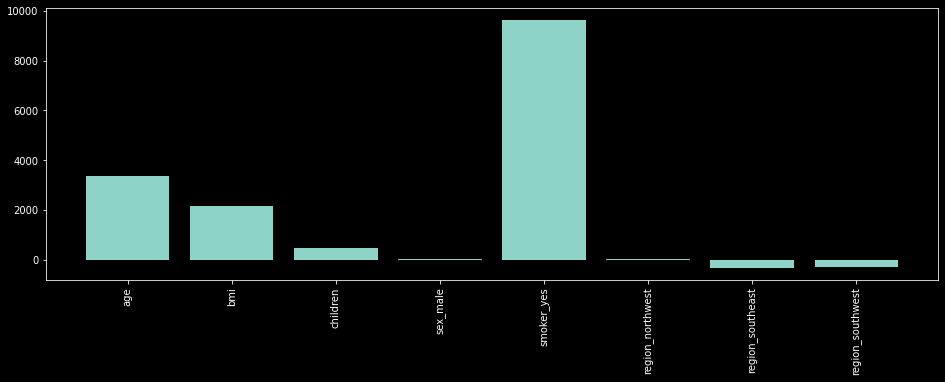

In [52]:
lasso_coef = lasso_best.best_estimator_.coef_

with plt.style.context('dark_background'):
    plt.figure(figsize=(16,5))
    plt.bar(X.columns.values.tolist(), lasso_coef.tolist())
    plt.xticks(rotation='vertical')
    plt.show()

# 7.) Interpret the coefficients

Lasso eliminated northwest and sex from the model. From the graph of the coefficients we can see the relative importance of each variable in the model. The most influential variables in predicting charges appear to be smoking, age, and bmi.




# 8.) Compare in and out of sample MSE’s

In [ ]:
#in sample:

In [90]:
MSE_train = mean_squared_error(y_train,lasso.predict(X_train))
np.sqrt(MSE_train)

6110.571688621114

In [ ]:
#out of sample:

In [89]:
MSE_test = mean_squared_error(y_test,lasso.predict(X_test))
np.sqrt(MSE_test)

5838.382793156386